# XgBoost Tianqi Chen 2014
* XFBoost, GBM'in hız ve tahmin performansını arttırmak üzere optimize edilmiş, ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.
* R, Python, Headoop, Scala, Julia ile kullanılabilir.
* Ölçeklenebilirdir.
* Hızlıdır.
* Tahmin başarısı yüksektir.
* Bir çok kaggle yarışmasında başarısını kanıtlamıştır.
---

library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('diabetes.csv')
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


model ve tahmin

In [4]:
!pip install xgboost

In [5]:
from xgboost import XGBClassifier

In [6]:
xgb = XGBClassifier().fit(X_train,y_train)

In [8]:
?xgb

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\ycanf\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float

In [7]:
xgb.score(X_test,y_test)

0.7272727272727273

tune

In [9]:
xgb = XGBClassifier()

In [10]:
xgb_params = {'n_estimators': [100,500,1000],
             'subsample': [0.6,0.8,1],
             'max_depth': [3,5,7],
             'learning_rate': [0.1,0.001,0.01]}

In [11]:
xgb_cv = GridSearchCV(xgb,xgb_params,cv=10, verbose=2, n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


In [15]:
xgb_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}

In [16]:
xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 0.8).fit(X_train,y_train)

In [17]:
xgb_tuned.score(X_test,y_test)

0.7619047619047619

# DEGİSKEN ÖNEM

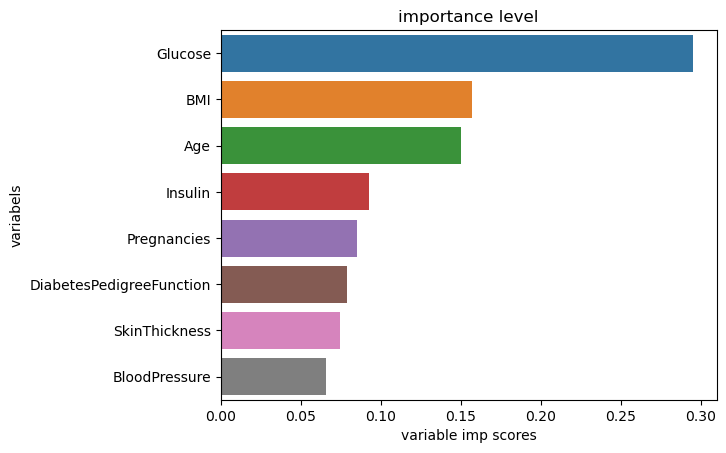

In [18]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y= feature_imp.index)
plt.xlabel('variable imp scores')
plt.ylabel('variabels')
plt.title('importance level')
plt.show()